# Gradient Boosting Classifier & Regressor Demo (From Scratch)

This notebook demonstrates how the custom-built Gradient Boosting algorithm performs on both classification and regression tasks using synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model.decision_tree_regressor import DecisionTreeRegressor
from model.gradient_boosting_classifier import GradientBoostingClassifier
from generate_data import classification_data_generator, linear_data_generator

## 🔹 Classification Example

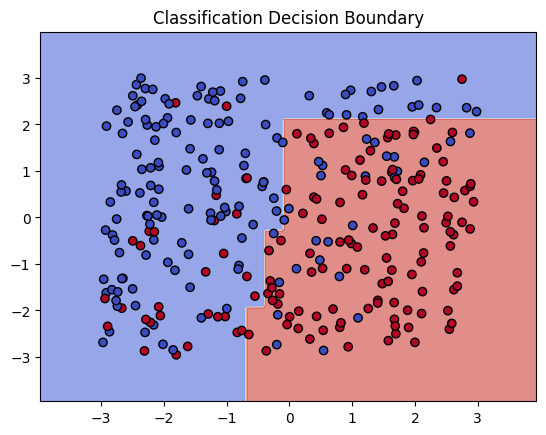

In [2]:
m_class = np.array([1.0, -1.0])
b_class = 0.0
range_class = [-3, 3]
X_class, y_class = classification_data_generator(m_class, b_class, range_class, N=300, seed=42)

model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=2, task='classification')
model.fit(X_class, y_class)
preds = model.predict(X_class)

def plot_decision_boundary(X, y, model):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Classification Decision Boundary")
    plt.show()

plot_decision_boundary(X_class, y_class, model)


## 🔹 Regression Example

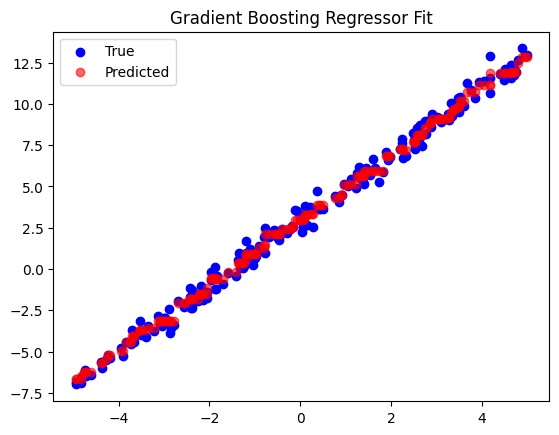

In [3]:
m_reg = np.array([2.0])
b_reg = 3.0
range_reg = [-5, 5]
X_reg, y_reg = linear_data_generator(m_reg, b_reg, range_reg, N=200, scale=0.5, seed=1)


model_reg = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, task='regression')
model_reg.fit(X_reg, y_reg)
preds_reg = model_reg.predict(X_reg)

plt.scatter(X_reg, y_reg, color='blue', label='True')
plt.scatter(X_reg, preds_reg, color='red', alpha=0.6, label='Predicted')
plt.legend()
plt.title("Gradient Boosting Regressor Fit")
plt.show()


Test accuracy: 0.911


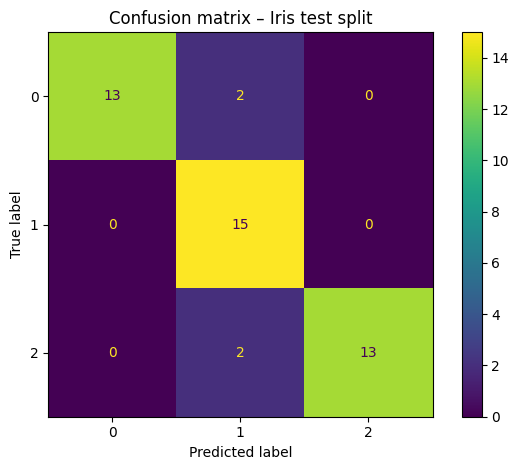

In [4]:
from sklearn.datasets import load_iris
import importlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.30,
        random_state=0,
        stratify=y,          # keep class proportions
    )

gb = GradientBoostingClassifier(
        task="classification",
        n_estimators=120,
        learning_rate=0.05,
        max_depth=3,
        min_samples_split=5,
    )
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion matrix – Iris test split")
plt.tight_layout()
plt.show()